# Bot-IoT Dataset Analysis

* **Author:** Patrik Goldschmidt (igoldschmidt@fit.vut.cz)
* **Project:** Network Intrusion Datasets: A Survey, Limitations, and Recommendations
* **Date:** 2024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The file all.csv was created by merging several partial files provided in the original dataset
PATH = '/data/kinit/gold_data/bot-iot/CSV/Entire Dataset/all.csv'

In [4]:
# Load the data
data = pd.read_csv(PATH)

/tmp/ipykernel_2290048/1536368800.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(PATH)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73370443 entries, 0 to 73370442
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pkSeqID       int64  
 1   stime         float64
 2   flgs          object 
 3   proto         object 
 4   saddr         object 
 5   sport         object 
 6   daddr         object 
 7   dport         object 
 8   pkts          int64  
 9   bytes         int64  
 10  state         object 
 11  ltime         float64
 12  seq           int64  
 13  dur           float64
 14  mean          float64
 15  stddev        float64
 16  smac          float64
 17  dmac          float64
 18  sum           float64
 19  min           float64
 20  max           float64
 21  soui          float64
 22  doui          float64
 23  sco           float64
 24  dco           float64
 25  spkts         int64  
 26  dpkts         int64  
 27  sbytes        int64  
 28  dbytes        int64  
 29  rate          float64
 30  srate         fl

In [6]:
data = data.sort_values('pkSeqID')

In [7]:
data.head(5)

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
10000000,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
10000001,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
10000002,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
10000003,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
10000004,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal


In [8]:
data['category'].value_counts()

DDoS              38532480
DoS               33005194
Reconnaissance     1821639
Normal                9543
Theft                 1587
Name: category, dtype: int64

<Axes: ylabel='category'>

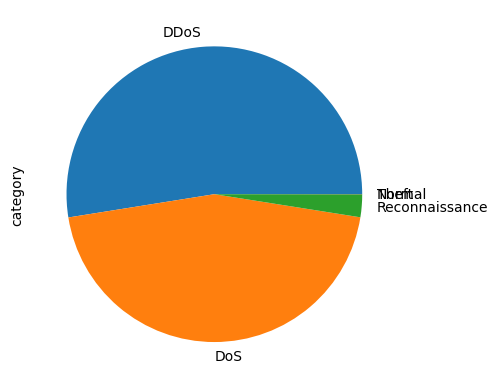

In [9]:
data['category'].value_counts().plot.pie()

In [10]:
data['attack'].value_counts()

1    73360900
0        9543
Name: attack, dtype: int64

In [11]:
# Ratio of attacking traffic
len(data[data['attack'] == 1]) / len(data)

0.9998699340005348

In [12]:
# Ratio of non-attacking traffic
len(data[data['attack'] == 0]) / len(data)

0.000130065999465207

In [13]:
# What is the first timestamp?
data.iloc[0]['stime']

1526344121.188091

In [14]:
# What is the last timestamp?
data.iloc[len(data) - 1]['stime']

1528102081.922655

In [15]:
data.iloc[len(data) - 1]['stime'] - data.iloc[0]['stime']

1757960.734564066

Data continuity analysis was performed via PCAP files in a console.